## Data Loading


In [ ]:
!pip install h3
!pip install geopandas folium
!pip install libpysal esda splot
!pip install keplergl
!jupyter nbextension enable --py --sys-prefix keplergl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 379.8/379.8 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 21.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.2-py2.py3-none-any.whl (1.6 MB)
  Created wheel for keplergl: filename=keplergl-0.3.2-py2.py3-none-any.whl size=17922313 sha256=a5d2a9026d5f4e

In [ ]:
# Prompt: Add the google drive dataset files

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/Shareddrives/CMPE-257/data/crashes.csv")

## Preprocessing

In [ ]:
# Column names
df.columns

Index(['_id', 'CrashFactId', 'Name', 'MinorInjuries', 'ModerateInjuries',
       'SevereInjuries', 'FatalInjuries', 'TcrNumber', 'CityDamageFlag',
       'ShortFormFlag', 'Distance', 'CrashDateTime', 'PedestrianAction',
       'RoadwaySurface', 'RoadwayCondition', 'Lighting',
       'PrimaryCollisionFactor', 'TrafficControl', 'Weather', 'CollisionType',
       'ProximityToIntersection', 'VehicleInvolvedWith',
       'PedestrianDirectionFrom', 'PedestrianDirectionTo',
       'DirectionFromIntersection', 'Comment', 'SpeedingFlag', 'HitAndRunFlag',
       'IntersectionNumber', 'AStreetName', 'BStreetName', 'Latitude',
       'Longitude'],
      dtype='object')

In [ ]:
# First few entries
df.head()

_id  CrashFactId           Name  MinorInjuries  ModerateInjuries  \
0    1       711791  CR-0000100908              2                 0   
1    2       692417  CR-0000097700              1                 0   
2    3       682960  CR-0000092543              0                 0   
3    4       682508  CR-0000092075              1                 0   
4    5       683141  CR-0000092724              0                 0   

   SevereInjuries  FatalInjuries    TcrNumber  CityDamageFlag  ShortFormFlag  \
0               0              0  23-306-0529           False          False   
1               0              0  23-081-0828           False          False   
2               0              0  22-162-0927           False          False   
3               0              0  22-093-0636           False          False   
4               0              0  22-045-4004           False           True   

   ...  PedestrianDirectionTo DirectionFromIntersection Comment SpeedingFlag  \
0  ...         Not Applicable                   East Of     NaN         True   
1  ...         Not Applicable                  South Of     NaN         True   
2  ...         Not Applicable                  North Of     NaN        False   
3  ...         Not Applicable                  North Of    BIKE        False   
4  ...         Not Applicable                   East Of     NaN        False   

  HitAndRunFlag IntersectionNumber  AStreetName     BStreetName   Latitude  \
0         False             110241  SPRUANCE ST  WHITETHORNE DR  37.300611   
1         False              22770   BOYNTON AV     CAPE COD CT  37.302711   
2          True              22857   BOYNTON AV     STARBIRD CI  37.306535   
3         False              22868   BOYNTON AV     STARBIRD CI  37.305191   
4         False              22868   BOYNTON AV     STARBIRD CI  37.305191   

    Longitude  
0 -121.936797  
1 -121.966043  
2 -121.966047  
3 -121.966039  
4 -121.966039  

[5 rows x 33 columns]

In [ ]:
# Summary statistics
df.describe()

_id    CrashFactId  MinorInjuries  ModerateInjuries  \
count  11252.000000   11252.000000   11252.000000      11252.000000   
mean    5626.500000  695610.612691       0.441877          0.157839   
std     3248.316949   12722.253522       0.745382          0.410042   
min        1.000000  679942.000000       0.000000          0.000000   
25%     2813.750000  685083.750000       0.000000          0.000000   
50%     5626.500000  691018.500000       0.000000          0.000000   
75%     8439.250000  699190.250000       1.000000          0.000000   
max    11252.000000  722515.000000      11.000000          5.000000   

       SevereInjuries  FatalInjuries      Distance  IntersectionNumber  \
count    11252.000000   11252.000000  10654.000000        11252.000000   
mean         0.040526       0.012975     82.906983        65187.589229   
std          0.207734       0.116273    197.896739        39122.524725   
min          0.000000       0.000000      0.000000         1121.000000   
25%          0.000000       0.000000      0.000000        32482.000000   
50%          0.000000       0.000000     27.000000        64344.000000   
75%          0.000000       0.000000     75.000000        95787.000000   
max          3.000000       2.000000   5280.000000       200533.000000   

           Latitude     Longitude  
count  11252.000000  11252.000000  
mean      37.315624   -121.859579  
std        0.354406      1.149978  
min        0.000000   -122.032269  
25%       37.294068   -121.900009  
50%       37.323249   -121.870947  
75%       37.347442   -121.834546  
max       37.453665      0.000000

Start with just basic time and location based features

In [ ]:
# Columns to keep
columns = ['Latitude', 'Longitude', 'Weather', 'CrashDateTime']

# Drop all columns except the specified ones
df_cleaned = df.drop(df.columns.difference(columns), axis=1)

df_cleaned.head()

CrashDateTime  Weather   Latitude   Longitude
0   11/2/2023 2:48:00 PM    Clear  37.300611 -121.936797
1  3/22/2023 10:31:00 PM    Clear  37.302711 -121.966043
2  6/11/2022 10:21:00 PM    Clear  37.306535 -121.966047
3    4/3/2022 5:09:00 PM    Clear  37.305191 -121.966039
4   2/14/2022 8:00:00 AM  Unknown  37.305191 -121.966039

Clean data and handle missing or invalid values

In [ ]:
# Remove entries where Longitude or Latitude is 0
df_cleaned = df_cleaned[(df_cleaned['Longitude'] != 0) & (df_cleaned['Latitude'] != 0)]
df_cleaned.describe()

Latitude     Longitude
count  11251.000000  11251.000000
mean      37.318940   -121.870410
std        0.042777      0.049711
min       37.167437   -122.032269
25%       37.294068   -121.900009
50%       37.323249   -121.870948
75%       37.347445   -121.834562
max       37.453665   -121.684883

In [ ]:
from pyproj import Proj, Transformer

# Convert latitude and longitude to UTM measured in meters
transformer = Transformer.from_crs("epsg:4326", "epsg:32610", always_xy=True)
df_cleaned['LongitudeUTM'], df_cleaned['LatitudeUTM'] = transformer.transform(df_cleaned['Longitude'].values, df_cleaned['Latitude'].values)

df_cleaned.head()

<ipython-input-10-f8beb22b25e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LongitudeUTM'], df_cleaned['LatitudeUTM'] = transformer.transform(df_cleaned['Longitude'].values, df_cleaned['Latitude'].values)
<ipython-input-10-f8beb22b25e2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['LongitudeUTM'], df_cleaned['LatitudeUTM'] = transformer.transform(df_cleaned['Longitude'].values, df_cleaned['Latitude'].values)


CrashDateTime  Weather   Latitude   Longitude   LongitudeUTM  \
0   11/2/2023 2:48:00 PM    Clear  37.300611 -121.936797  594227.356120   
1  3/22/2023 10:31:00 PM    Clear  37.302711 -121.966043  591632.821272   
2  6/11/2022 10:21:00 PM    Clear  37.306535 -121.966047  591627.764812   
3    4/3/2022 5:09:00 PM    Clear  37.305191 -121.966039  591630.157314   
4   2/14/2022 8:00:00 AM  Unknown  37.305191 -121.966039  591630.157314   

    LatitudeUTM  
0  4.128751e+06  
1  4.128955e+06  
2  4.129379e+06  
3  4.129230e+06  
4  4.129230e+06

In [ ]:
# Convert crash time to datetime format
df_cleaned['CrashDateTime'] = pd.to_datetime(df_cleaned['CrashDateTime'], errors='coerce')
df_cleaned = df_cleaned.sort_values(by='CrashDateTime', ascending=False)

df_cleaned.head()

<ipython-input-11-6571b0bdd49d>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_cleaned['CrashDateTime'] = pd.to_datetime(df_cleaned['CrashDateTime'], errors='coerce')


CrashDateTime Weather   Latitude   Longitude   LongitudeUTM  \
6835 2024-09-13 23:55:00   Clear  37.261742 -121.931411  594753.448820   
5510 2024-09-10 06:24:00  Cloudy  37.320110 -121.847509  602114.527864   
4372 2024-08-29 12:14:00   Clear  37.363690 -121.894229  597918.164349   
419  2024-08-22 20:49:00   Clear  37.387972 -121.882559  598919.693195   
6518 2024-08-18 22:31:00   Clear  37.276928 -121.841897  602670.457348   

       LatitudeUTM  
6835  4.124444e+06  
5510  4.131007e+06  
4372  4.135792e+06  
419   4.138499e+06  
6518  4.126222e+06

In [ ]:
# Split CrashDateTime into components
df_cleaned['Year'] = df_cleaned['CrashDateTime'].dt.year
df_cleaned['Month'] = df_cleaned['CrashDateTime'].dt.month
df_cleaned['Day'] = df_cleaned['CrashDateTime'].dt.day
df_cleaned['DayOfWeek'] = df_cleaned['CrashDateTime'].dt.dayofweek
df_cleaned['Hour'] = df_cleaned['CrashDateTime'].dt.hour

df_cleaned.head()

CrashDateTime Weather   Latitude   Longitude   LongitudeUTM  \
6835 2024-09-13 23:55:00   Clear  37.261742 -121.931411  594753.448820   
5510 2024-09-10 06:24:00  Cloudy  37.320110 -121.847509  602114.527864   
4372 2024-08-29 12:14:00   Clear  37.363690 -121.894229  597918.164349   
419  2024-08-22 20:49:00   Clear  37.387972 -121.882559  598919.693195   
6518 2024-08-18 22:31:00   Clear  37.276928 -121.841897  602670.457348   

       LatitudeUTM  Year  Month  Day  DayOfWeek  Hour  
6835  4.124444e+06  2024      9   13          4    23  
5510  4.131007e+06  2024      9   10          1     6  
4372  4.135792e+06  2024      8   29          3    12  
419   4.138499e+06  2024      8   22          3    20  
6518  4.126222e+06  2024      8   18          6    22

In [ ]:
# Check for missing values
df_cleaned.isnull().sum()

CrashDateTime    0
Weather          0
Latitude         0
Longitude        0
LongitudeUTM     0
LatitudeUTM      0
Year             0
Month            0
Day              0
DayOfWeek        0
Hour             0
dtype: int64

In [ ]:
# view all of the columns
df_cleaned.columns

Index(['CrashDateTime', 'Weather', 'Latitude', 'Longitude', 'LongitudeUTM',
       'LatitudeUTM', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour'],
      dtype='object')

**TEMPORAL**

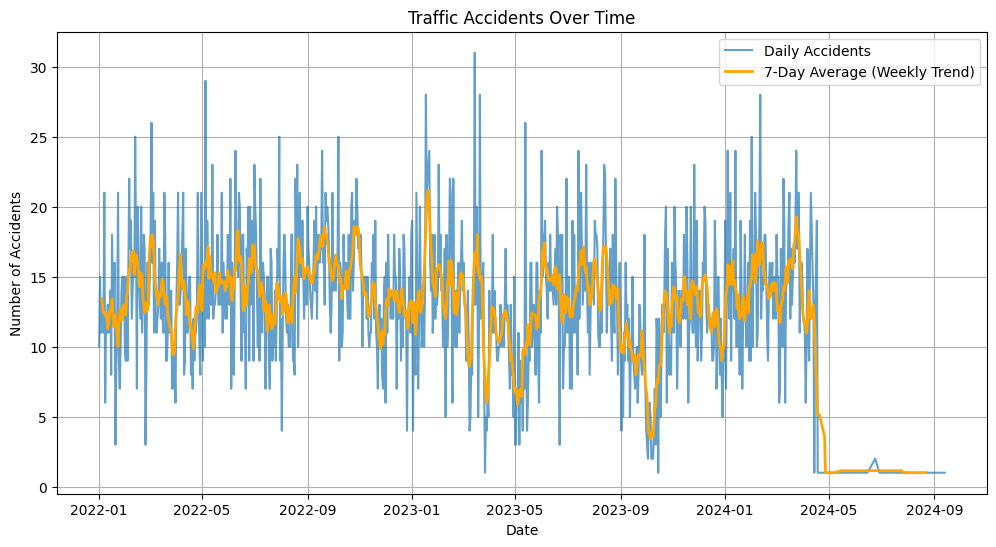

In [ ]:
# Group by date and count the total accidents
df_cleaned['Date'] = pd.to_datetime(df_cleaned[['Year', 'Month', 'Day']])
daily_accidents = df_cleaned.groupby('Date').size()

# Calculate the 7-day rolling average for weekly trends
weekly_accidents = daily_accidents.rolling(window=7, center=True).mean()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_accidents, label='Daily Accidents', alpha=0.7)
plt.plot(weekly_accidents, label='7-Day Average (Weekly Trend)', linewidth=2, color='orange')

# Add labels and legend
plt.title('Traffic Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df_cleaned.head(30)

CrashDateTime  Weather   Latitude   Longitude   LongitudeUTM  \
6835  2024-09-13 23:55:00    Clear  37.261742 -121.931411  594753.448820   
5510  2024-09-10 06:24:00   Cloudy  37.320110 -121.847509  602114.527864   
4372  2024-08-29 12:14:00    Clear  37.363690 -121.894229  597918.164349   
419   2024-08-22 20:49:00    Clear  37.387972 -121.882559  598919.693195   
6518  2024-08-18 22:31:00    Clear  37.276928 -121.841897  602670.457348   
883   2024-08-06 16:20:00    Clear  37.261749 -121.922321  595559.472792   
4575  2024-08-03 22:02:00    Clear  37.183983 -121.705708  614885.616430   
7941  2024-07-28 06:18:00    Clear  37.333600 -121.874330  599720.175839   
8818  2024-07-26 12:24:00    Clear  37.345071 -121.884299  598821.976549   
7690  2024-07-25 18:26:00    Clear  37.309762 -121.844906  602359.123143   
7415  2024-07-16 12:29:00    Clear  37.266156 -121.941018  593896.074512   
2781  2024-06-29 02:26:00    Clear  37.373757 -121.837590  602920.081980   
5007  2024-06-24 08:28:00    Clear  37.201129 -121.736404  612135.454037   
1625  2024-06-24 06:36:00    Clear  37.343470 -121.928591  594900.745588   
10252 2024-06-15 07:06:00    Clear  37.399179 -121.902636  597127.939037   
1150  2024-05-27 13:52:00    Clear  37.398103 -121.912929  596218.276621   
10721 2024-05-15 20:44:00    Clear  37.354305 -121.817473  604728.367010   
949   2024-05-07 07:23:00    Clear  37.293421 -121.833214  603417.657172   
5012  2024-05-02 08:36:00    Clear  37.227901 -121.807296  605806.587046   
2640  2024-04-30 13:38:00    Clear  37.340133 -121.880618  599154.468143   
1266  2024-04-27 16:39:00    Clear  37.388036 -121.859127  600993.960591   
2073  2024-04-26 22:05:00    Clear  37.352805 -121.831896  603453.040363   
2316  2024-04-20 18:39:00    Clear  37.338925 -121.837709  602957.154447   
4408  2024-04-18 10:05:00    Clear  37.331112 -121.875323  599635.430691   
11142 2024-04-17 20:05:00    Clear  37.350771 -121.920732  595587.590188   
1945  2024-04-17 18:40:00  Unknown  37.299909 -121.982645  590164.799620   
7362  2024-04-17 18:25:00  Unknown  37.307360 -121.791058  607134.516856   
1152  2024-04-17 18:19:00    Clear  37.398103 -121.912929  596218.276621   
3691  2024-04-17 17:26:00    Clear  37.304488 -121.992466  589288.950263   
5170  2024-04-17 17:11:00    Clear  37.323296 -121.899259  597525.010258   

        LatitudeUTM  Year  Month  Day  DayOfWeek  Hour       Date  
6835   4.124444e+06  2024      9   13          4    23 2024-09-13  
5510   4.131007e+06  2024      9   10          1     6 2024-09-10  
4372   4.135792e+06  2024      8   29          3    12 2024-08-29  
419    4.138499e+06  2024      8   22          3    20 2024-08-22  
6518   4.126222e+06  2024      8   18          6    22 2024-08-18  
883    4.124454e+06  2024      8    6          1    16 2024-08-06  
4575   4.116067e+06  2024      8    3          5    22 2024-08-03  
7941   4.132475e+06  2024      7   28          6     6 2024-07-28  
8818   4.133737e+06  2024      7   26          4    12 2024-07-26  
7690   4.129862e+06  2024      7   25          3    18 2024-07-25  
7415   4.124924e+06  2024      7   16          1    12 2024-07-16  
2781   4.136970e+06  2024      6   29          5     2 2024-06-29  
5007   4.117932e+06  2024      6   24          0     8 2024-06-24  
1625   4.133514e+06  2024      6   24          0     6 2024-06-24  
10252  4.139721e+06  2024      6   15          5     7 2024-06-15  
1150   4.139591e+06  2024      5   27          0    13 2024-05-27  
10721  4.134834e+06  2024      5   15          2    20 2024-05-15  
949    4.128061e+06  2024      5    7          1     7 2024-05-07  
5012   4.120821e+06  2024      5    2          3     8 2024-05-02  
2640   4.133193e+06  2024      4   30          1    13 2024-04-30  
1266   4.138530e+06  2024      4   27          5    16 2024-04-27  
2073   4.134651e+06  2024      4   26          4    22 2024-04-26  
2316   4.133105e+06  2024      4   20          5    18 2024-04-20  
4408   4.132198e+06  20

In [ ]:
# Looks like the accident data is incomplete past April 17, let's just remove all 2024 entries
cutoff_date = '2023-12-31'

# Filter data to include only entries before the cutoff date
df_cleaned = df_cleaned[df_cleaned['Date'] <= cutoff_date]

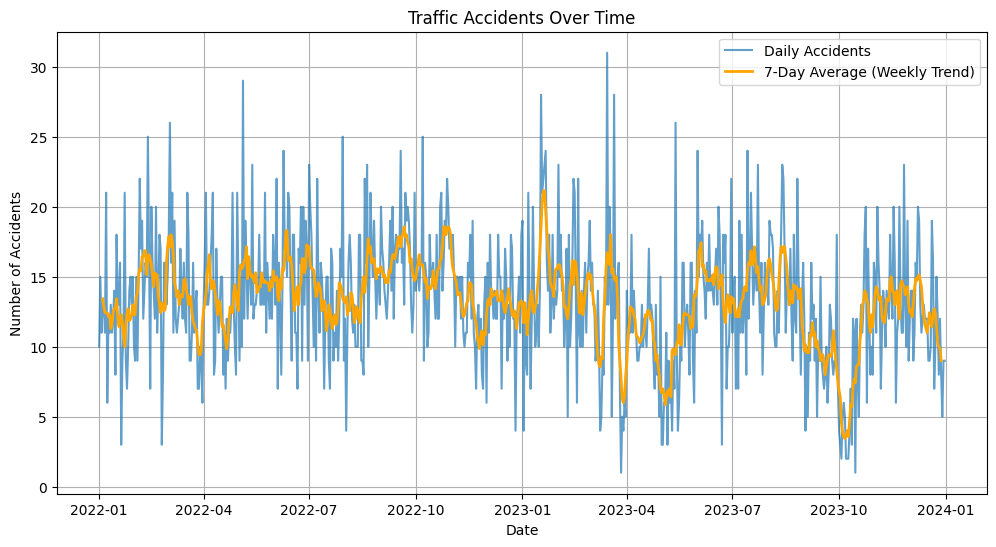

In [ ]:
daily_accidents = df_cleaned.groupby('Date').size()

# Calculate the 7-day rolling average for weekly trends
weekly_accidents = daily_accidents.rolling(window=7, center=True).mean()

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(daily_accidents, label='Daily Accidents', alpha=0.7)
plt.plot(weekly_accidents, label='7-Day Average (Weekly Trend)', linewidth=2, color='orange')

# Add labels and legend
plt.title('Traffic Accidents Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-19-6253e681e886>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_per_day.index, y=accidents_per_day.values, palette='viridis')


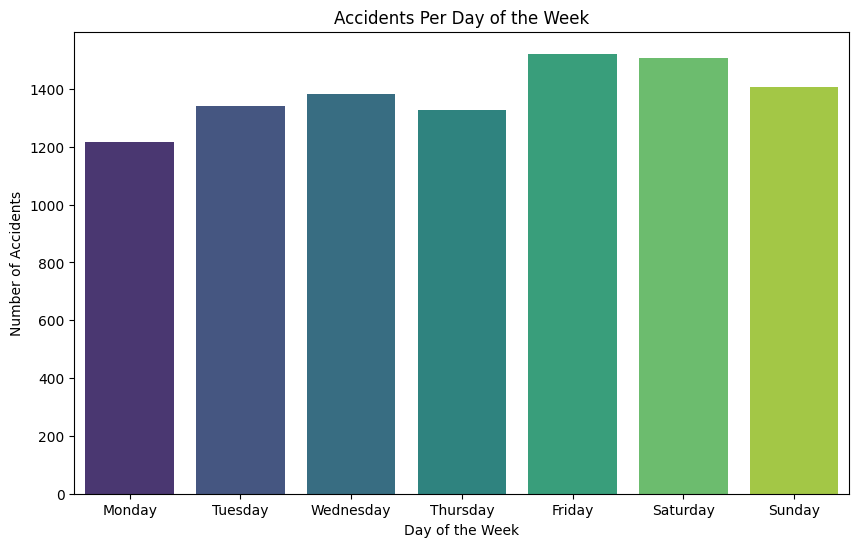

In [ ]:
# Group by 'DayOfWeek' and count accidents
accidents_per_day = df_cleaned.groupby('DayOfWeek').size()

# Convert DayOfWeek integers to day names
accidents_per_day.index = accidents_per_day.index.map({
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
})

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_per_day.index, y=accidents_per_day.values, palette='viridis')

# Add labels and title
plt.title('Accidents Per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')

# Show the plot
plt.show()

<ipython-input-20-187ce711613b>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_per_month.index, y=accidents_per_month.values, palette='viridis')


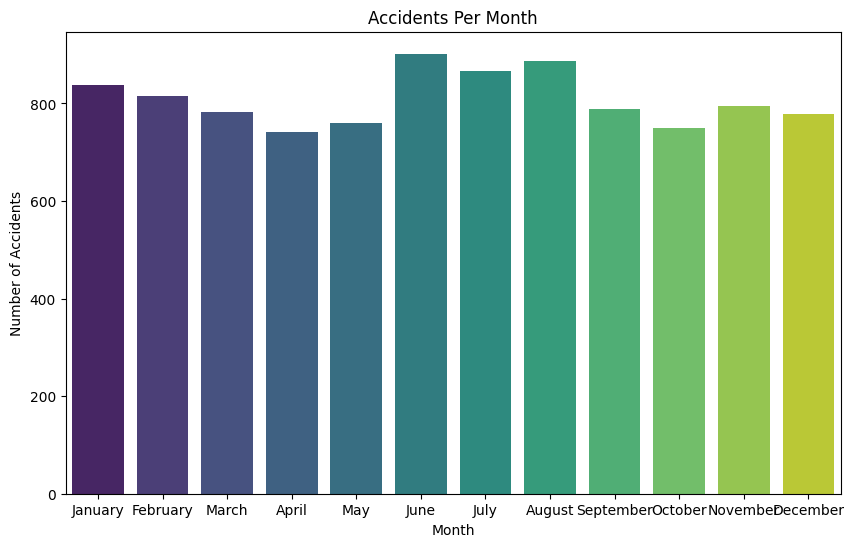

In [ ]:
# Group by 'Month' and count accidents
accidents_per_month = df_cleaned.groupby('Month').size()

# Convert Month integers to month names
accidents_per_month.index = accidents_per_month.index.map({
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
})

# Plot the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_per_month.index, y=accidents_per_month.values, palette='viridis')

# Add labels and title
plt.title('Accidents Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

# Show the plot
plt.show()


<ipython-input-21-78609c0289cb>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidents_per_shift.index, y=accidents_per_shift.values, palette='coolwarm')


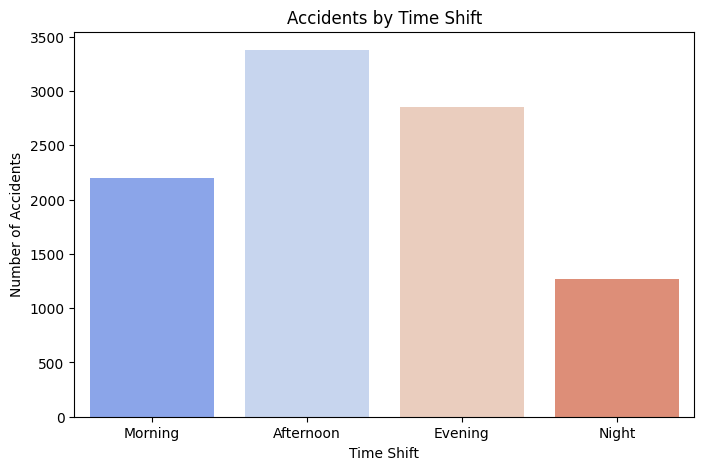

In [ ]:
# Define shifts based on hours
def assign_shift(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Apply the shift assignment to the data
df_cleaned['Shift'] = df_cleaned['Hour'].apply(assign_shift)

# Group by shifts and count accidents
accidents_per_shift = df_cleaned['Shift'].value_counts()

# Sort shifts for logical ordering
shift_order = ['Morning', 'Afternoon', 'Evening', 'Night']
accidents_per_shift = accidents_per_shift.reindex(shift_order)

# Plot the bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x=accidents_per_shift.index, y=accidents_per_shift.values, palette='coolwarm')

# Add labels and title
plt.title('Accidents by Time Shift')
plt.xlabel('Time Shift')
plt.ylabel('Number of Accidents')

# Show the plot
plt.show()


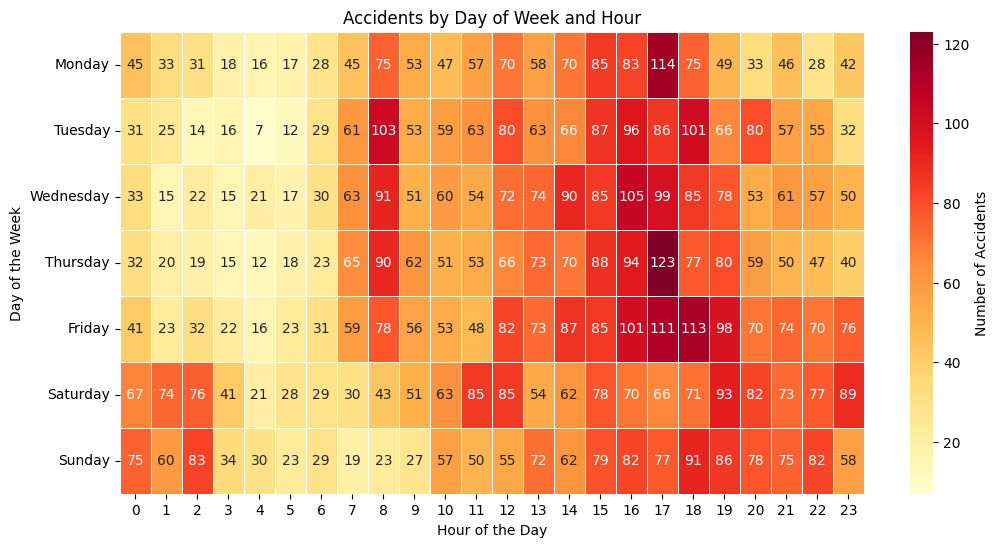

In [ ]:
# Aggregate the data by DayOfWeek and Hour
heatmap_data = (
    df_cleaned.groupby(['DayOfWeek', 'Hour'])
    .size()
    .unstack(fill_value=0)  # Create a matrix with DayOfWeek as rows and Hour as columns
)

# Set the days of the week in order if not already
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_data.index = day_order

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data,
    cmap='YlOrRd',
    annot=True,  # Add numbers to the heatmap
    fmt='d',     # Format as integers
    linewidths=.5,
    cbar_kws={'label': 'Number of Accidents'}
)

# Add labels and title
plt.title('Accidents by Day of Week and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

# Show the plot
plt.show()


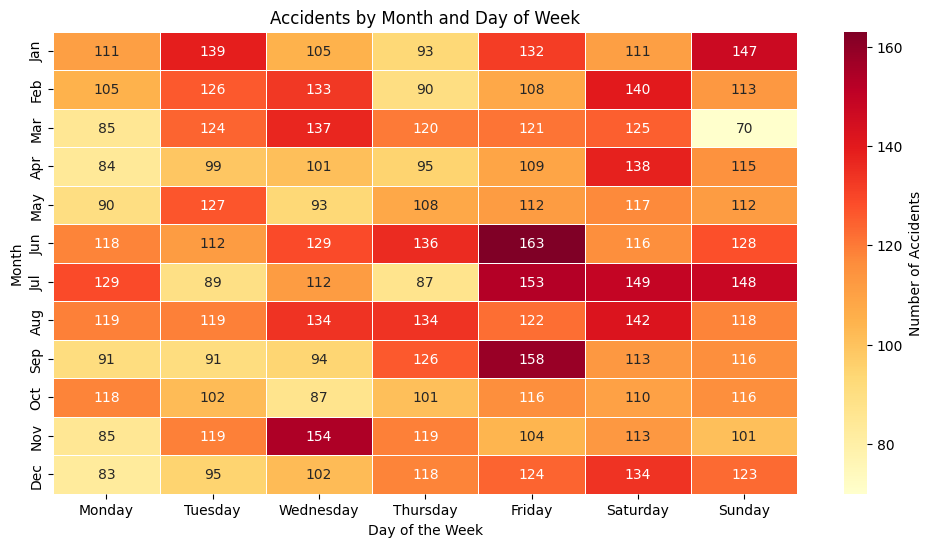

In [ ]:
# Aggregate the data by Month and DayOfWeek
heatmap_month_day = (
    df_cleaned.groupby(['Month', 'DayOfWeek'])
    .size()
    .unstack(fill_value=0)  # Create a matrix with Month as rows and DayOfWeek as columns
)

# Set the days of the week in order if not already
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
heatmap_month_day.columns = day_order
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_month_day.index = month_order

# Plot the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_month_day,
    cmap='YlOrRd',  # Use a warm color palette
    annot=True,     # Add numbers to the heatmap
    fmt='d',        # Format as integers
    linewidths=.5,
    cbar_kws={'label': 'Number of Accidents'}
)

# Add labels and title
plt.title('Accidents by Month and Day of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Month')

# Show the plot
plt.show()


In [ ]:
import h3
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import Polygon

# Define the resolution (e.g., 8 for a finer resolution)
resolution = 9

df_cleaned['h3_cell'] = df_cleaned.apply(lambda row: h3.latlng_to_cell(row['Latitude'], row['Longitude'], resolution), axis=1)
# Now, the DataFrame has H3 indices for each accident
df_cleaned['geometry'] = df_cleaned['h3_cell'].apply(lambda cell: Polygon(h3.cell_to_boundary(cell)))
print(df_cleaned.head())


           CrashDateTime  Weather   Latitude   Longitude   LongitudeUTM  \
1590 2023-12-31 22:30:00  Unknown  37.341549 -121.891719  598169.303938   
5590 2023-12-31 21:00:00    Clear  37.331249 -121.812756  605178.309498   
7115 2023-12-31 20:54:00    Clear  37.343655 -121.837564  602963.567698   
2124 2023-12-31 20:37:00    Clear  37.321557 -121.804367  605935.102673   
474  2023-12-31 19:12:00  Unknown  37.278839 -121.827002  603988.333545   

       LatitudeUTM  Year  Month  Day  DayOfWeek  Hour       Date    Shift  \
1590  4.133339e+06  2023     12   31          6    22 2023-12-31  Evening   
5590  4.132281e+06  2023     12   31          6    21 2023-12-31  Evening   
7115  4.133630e+06  2023     12   31          6    20 2023-12-31  Evening   
2124  4.131215e+06  2023     12   31          6    20 2023-12-31  Evening   
474   4.126450e+06  2023     12   31          6    19 2023-12-31  Evening   

              h3_cell                                           geometry  
1590  89283

In [ ]:
from keplergl import KeplerGl

# Initialize the map
kepler_map = KeplerGl()

def fix_polygon_coords(h3_cell):
    # Get the polygon boundary from the H3 cell
    boundary = h3.cell_to_boundary(h3_cell)
    # Reorder coordinates to ensure it's (longitude, latitude)
    fixed_boundary = [(lon, lat) for lat, lon in boundary]  # Swap lat/lon if needed
    # Create a Polygon with the fixed coordinates
    return Polygon(fixed_boundary)

def add_data_kepler(df, name):
    df['geometry'] = df['h3_cell'].apply(lambda cell: Polygon(h3.cell_to_boundary(cell)))
    df['geometry'] = df['h3_cell'].apply(fix_polygon_coords)
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")
    kepler_map.add_data(gdf, name=name)

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [ ]:
# Aggregate accident counts by H3 index
aggregated_data = df_cleaned.groupby('h3_cell').size().reset_index(name='Accident_Count')

add_data_kepler(aggregated_data, 'San Jose Accidents')

# Display the aggregated data
print(aggregated_data.describe())

       Accident_Count
count     1831.000000
mean         5.300382
std          6.829412
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         77.000000


In [ ]:
import folium
from folium import Choropleth
from branca.colormap import linear
from branca.element import Element, Figure

# Define a color scale for accident frequency
colormap = linear.YlOrRd_09.scale(aggregated_data['Accident_Count'].min(), aggregated_data['Accident_Count'].max())

# Create a base folium map
m = folium.Map(location=[37.3, -121.9], zoom_start=12)

# Add hexagons to the map based on H3 cells
for _, row in aggregated_data.iterrows():
    # Get the boundary coordinates of the H3 cell
    hex_coords = h3.cell_to_boundary(row['h3_cell'])

    # Get the accident count and assign a color based on it
    accident_count = row['Accident_Count']
    color = colormap(accident_count)  # Get color from the colormap based on accident count

    # Create a folium Polygon for the hexagon
    folium.Polygon(
        locations=hex_coords,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Accidents: {row['Accident_Count']}",
    ).add_to(m)

# Add a title using an HTML div
title_html = '''
     <div style="position: fixed;
                 top: 10px; left: 50px; width: 100%; height: 30px;
                 background-color: white; text-align: center;
                 font-size: 20px; font-weight: bold;
                 z-index: 1000;">
         Accidents in San Jose
     </div>
     '''
m.get_root().html.add_child(Element(title_html))

# Add the color scale to the map
colormap.add_to(m)

# Display the map
m

In [ ]:
aggregated_data = df_cleaned.groupby(['h3_cell', 'DayOfWeek']).size().reset_index(name='Accident_Count')
# Add to kepler map
add_data_kepler(aggregated_data, 'San Jose Accidents By Day of Week')

In [ ]:
# Filter for weekdays (Monday to Friday: 0-4)
aggregated_data = df_cleaned[df_cleaned['DayOfWeek'].isin([0, 1, 2, 3, 4])]

# Aggregate accident counts by H3 index
aggregated_data = aggregated_data.groupby('h3_cell').size().reset_index(name='Accident_Count')

# Define a color scale for accident frequency
colormap = linear.YlOrRd_09.scale(aggregated_data['Accident_Count'].min(), aggregated_data['Accident_Count'].max())

# Create a base folium map
m = folium.Map(location=[37.3, -121.9], zoom_start=12)

# Add hexagons to the map based on H3 cells
for _, row in aggregated_data.iterrows():
    # Get the boundary coordinates of the H3 cell
    hex_coords = h3.cell_to_boundary(row['h3_cell'])

    # Get the accident count and assign a color based on it
    accident_count = row['Accident_Count']
    color = colormap(accident_count)  # Get color from the colormap based on accident count

    # Create a folium Polygon for the hexagon
    folium.Polygon(
        locations=hex_coords,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Accidents: {row['Accident_Count']}",
    ).add_to(m)

# Add the color scale to the map
colormap.caption = "Accidents in San Jose Weekdays"
colormap.add_to(m)

# Display the map
m

In [ ]:
# Filter for weekends
aggregated_data = df_cleaned[df_cleaned['DayOfWeek'].isin([5, 6])]

# Aggregate accident counts by H3 index
aggregated_data = aggregated_data.groupby('h3_cell').size().reset_index(name='Accident_Count')

# Define a color scale for accident frequency
colormap = linear.YlOrRd_09.scale(aggregated_data['Accident_Count'].min(), aggregated_data['Accident_Count'].max())

# Create a base folium map
m = folium.Map(location=[37.3, -121.9], zoom_start=12)

# Add hexagons to the map based on H3 cells
for _, row in aggregated_data.iterrows():
    # Get the boundary coordinates of the H3 cell
    hex_coords = h3.cell_to_boundary(row['h3_cell'])

    # Get the accident count and assign a color based on it
    accident_count = row['Accident_Count']
    color = colormap(accident_count)  # Get color from the colormap based on accident count

    # Create a folium Polygon for the hexagon
    folium.Polygon(
        locations=hex_coords,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Accidents: {row['Accident_Count']}",
    ).add_to(m)

# Add the color scale to the map
colormap.caption = "Accidents in San Jose Weekends"
colormap.add_to(m)

# Display the map
m

In [ ]:
aggregated_data = df_cleaned.groupby(['h3_cell', 'Month']).size().reset_index(name='Accident_Count')
# Add to kepler map
add_data_kepler(aggregated_data, 'San Jose Accidents By Month')

In [ ]:
# Filter for Feb
aggregated_data = df_cleaned[df_cleaned['Month'] == 1]

# Aggregate accident counts by H3 index
aggregated_data = aggregated_data.groupby('h3_cell').size().reset_index(name='Accident_Count')

# Define a color scale for accident frequency
colormap = linear.YlOrRd_09.scale(aggregated_data['Accident_Count'].min(), aggregated_data['Accident_Count'].max())

# Create a base folium map
m = folium.Map(location=[37.3, -121.9], zoom_start=12)

# Add hexagons to the map based on H3 cells
for _, row in aggregated_data.iterrows():
    # Get the boundary coordinates of the H3 cell
    hex_coords = h3.cell_to_boundary(row['h3_cell'])

    # Get the accident count and assign a color based on it
    accident_count = row['Accident_Count']
    color = colormap(accident_count)  # Get color from the colormap based on accident count

    # Create a folium Polygon for the hexagon
    folium.Polygon(
        locations=hex_coords,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Accidents: {row['Accident_Count']}",
    ).add_to(m)

# Add the color scale to the map
colormap.caption = "Accidents in San Jose Feb"
colormap.add_to(m)

# Display the map
m

In [ ]:
# Filter for May
aggregated_data = df_cleaned[df_cleaned['Month'] == 4]

# Aggregate accident counts by H3 index
aggregated_data = aggregated_data.groupby('h3_cell').size().reset_index(name='Accident_Count')

# Define a color scale for accident frequency
colormap = linear.YlOrRd_09.scale(aggregated_data['Accident_Count'].min(), aggregated_data['Accident_Count'].max())

# Create a base folium map
m = folium.Map(location=[37.3, -121.9], zoom_start=12)

# Add hexagons to the map based on H3 cells
for _, row in aggregated_data.iterrows():
    # Get the boundary coordinates of the H3 cell
    hex_coords = h3.cell_to_boundary(row['h3_cell'])

    # Get the accident count and assign a color based on it
    accident_count = row['Accident_Count']
    color = colormap(accident_count)  # Get color from the colormap based on accident count

    # Create a folium Polygon for the hexagon
    folium.Polygon(
        locations=hex_coords,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Accidents: {row['Accident_Count']}",
    ).add_to(m)

# Add the color scale to the map
colormap.caption = "Accidents in San Jose May"
colormap.add_to(m)

# Display the map
m

In [ ]:
# Filter for Aug
aggregated_data = df_cleaned[df_cleaned['Month'] == 7]

# Aggregate accident counts by H3 index
aggregated_data = aggregated_data.groupby('h3_cell').size().reset_index(name='Accident_Count')

# Define a color scale for accident frequency
colormap = linear.YlOrRd_09.scale(aggregated_data['Accident_Count'].min(), aggregated_data['Accident_Count'].max())

# Create a base folium map
m = folium.Map(location=[37.3, -121.9], zoom_start=12)

# Add hexagons to the map based on H3 cells
for _, row in aggregated_data.iterrows():
    # Get the boundary coordinates of the H3 cell
    hex_coords = h3.cell_to_boundary(row['h3_cell'])

    # Get the accident count and assign a color based on it
    accident_count = row['Accident_Count']
    color = colormap(accident_count)  # Get color from the colormap based on accident count

    # Create a folium Polygon for the hexagon
    folium.Polygon(
        locations=hex_coords,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Accidents: {row['Accident_Count']}",
    ).add_to(m)

# Add the color scale to the map
colormap.caption = "Accidents in San Jose Aug"
colormap.add_to(m)

# Display the map
m

In [ ]:
# Filter for Nov
aggregated_data = df_cleaned[df_cleaned['Month'] == 10]

# Aggregate accident counts by H3 index
aggregated_data = aggregated_data.groupby('h3_cell').size().reset_index(name='Accident_Count')

# Define a color scale for accident frequency
colormap = linear.YlOrRd_09.scale(aggregated_data['Accident_Count'].min(), aggregated_data['Accident_Count'].max())

# Create a base folium map
m = folium.Map(location=[37.3, -121.9], zoom_start=12)

# Add hexagons to the map based on H3 cells
for _, row in aggregated_data.iterrows():
    # Get the boundary coordinates of the H3 cell
    hex_coords = h3.cell_to_boundary(row['h3_cell'])

    # Get the accident count and assign a color based on it
    accident_count = row['Accident_Count']
    color = colormap(accident_count)  # Get color from the colormap based on accident count

    # Create a folium Polygon for the hexagon
    folium.Polygon(
        locations=hex_coords,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"Accidents: {row['Accident_Count']}",
    ).add_to(m)

# Add the color scale to the map
colormap.caption = "Accidents in San Jose Nov"
colormap.add_to(m)

# Display the map
m

In [ ]:
import pandas as pd
import geopandas as gpd
import h3

# Aggregate accident counts by H3 index
aggregated_data = df_cleaned.groupby('h3_cell').size().reset_index(name='Accident_Count')
aggregated_data['geometry'] = aggregated_data['h3_cell'].apply(lambda cell: Polygon(h3.cell_to_boundary(cell)))
# Display the aggregated data
print(aggregated_data.describe())

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(aggregated_data, geometry='geometry', crs="EPSG:4326")

# Optional: Save to GeoJSON
gdf.to_file("accidents_h3.geojson", driver="GeoJSON")

gdf.columns

       Accident_Count
count     1831.000000
mean         5.300382
std          6.829412
min          1.000000
25%          1.000000
50%          3.000000
75%          6.000000
max         77.000000


Index(['h3_cell', 'Accident_Count', 'geometry'], dtype='object')

In [ ]:
import libpysal as lp
from esda.moran import Moran
from splot.esda import moran_scatterplot
import matplotlib.pyplot as plt

# Create a spatial weights matrix
weights = lp.weights.Queen.from_dataframe(gdf, use_index=False)

# Identify islands (cells with no neighbors)
islands = [i for i, w in enumerate(weights.weights.values()) if len(w) == 0]
print(f"Islands: {islands}")

# Remove islands from GeoDataFrame and weights
gdf = gdf.drop(index=islands).reset_index(drop=True)
weights = lp.weights.Queen.from_dataframe(gdf)

# Calculate Moran's I
moran = Moran(gdf['Accident_Count'], weights)

# Print Moran's I results
print(f"Moran's I: {moran.I}")
print(f"p-value: {moran.p_sim}")

# Moran scatterplot
fig, ax = moran_scatterplot(moran)
plt.show()

In [ ]:
import libpysal as lp
from esda.moran import Moran_Local
import matplotlib.pyplot as plt
from branca.colormap import StepColormap

local_moran = Moran_Local(gdf['Accident_Count'], weights)

# Add clusters to the grid
gdf['Moran_Local'] = local_moran.Is
gdf['Cluster'] = local_moran.q

# Ensure the GeoDataFrame is in a geographic coordinate system (e.g., EPSG:4326)
gdf = gdf.to_crs(epsg=4326)

# Create a base folium map centered on San Jose
m = folium.Map(location=[37.33, -121.88], zoom_start=12)

# Define a color map for clusters
cluster_colors = {
    1: 'red',       # High-High
    2: 'lightblue', # Low-High
    3: 'darkblue',  # Low-Low
    4: 'orange',    # High-Low
}
# Create a step colormap for the legend
colormap = StepColormap(
    colors=[cluster_colors[1], cluster_colors[2], cluster_colors[3], cluster_colors[4]],
    vmin=1, vmax=4,
    caption='Local Moran’s I Clusters'
)

# Add polygons for clusters to the map
for _, row in gdf.iterrows():
    # Get polygon coordinates
    if not row['geometry'].is_empty:
        hex_coords = [(x, y) for x, y in row['geometry'].exterior.coords]

        # Assign a color based on the cluster value
        color = colormap(row['Cluster'])

        # Add the polygon to the map
        folium.Polygon(
            locations=hex_coords,
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.6,
            popup=f"Cluster: {row['Cluster']}, Moran's I: {row['Moran_Local']:.3f}, Accidents: {row['Accident_Count']}",
        ).add_to(m)

legend_html = """
<div style="position: fixed;
            bottom: 50px; left: 50px; width: 150px; height: 120px;
            background-color: white; z-index:9999; font-size:14px;
            border:2px solid grey; padding: 10px;">
    <strong>Cluster Types</strong><br>
    <i style="background:red; width:15px; height:15px; display:inline-block;"></i> HH (High-High)<br>
    <i style="background:lightblue; width:15px; height:15px; display:inline-block;"></i> LH (Low-High)<br>
    <i style="background:darkblue; width:15px; height:15px; display:inline-block;"></i> LL (Low-Low)<br>
    <i style="background:orange; width:15px; height:15px; display:inline-block;"></i> HL (High-Low)<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m


In [ ]:
fig, ax = moran_scatterplot(local_moran)
plt.title("Moran Local Scatterplot")
plt.xlabel("Accident Count")
plt.ylabel("Spatial Lag of Accident Count")
plt.show()

In [ ]:
kepler_map.save_to_html(file_name="kepler_map.html")

In [ ]:
df_cleaned.columns

In [ ]:
# Group by H3 cell and hour, and calculate whether an accident occurred
df_clean = df_cleaned.groupby(['h3_cell', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek']).size().reset_index(name='Accident_Count')
df_clean['Accident_Count'].value_counts()

In [ ]:
# Extract all unique time combinations
time_combinations = df_clean[['Year', 'Month', 'Day', 'Hour', 'DayOfWeek']].drop_duplicates()

# Generate all unique H3 cells
unique_h3_cells = df_clean['h3_cell'].unique()

# Create a full cross-join of time combinations and H3 cells
all_time_cell_combinations = time_combinations.merge(
    pd.DataFrame({'h3_cell': unique_h3_cells}),
    how='cross'
)

# Merge with the original dataset to mark accidents
full_dataset = all_time_cell_combinations.merge(
    df_clean[['h3_cell', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'Accident_Count']],
    on=['h3_cell', 'Year', 'Month', 'Day', 'Hour', 'DayOfWeek'],
    how='left'
)

# Replace NaN Accident_Count with 0 (indicating no accidents)
full_dataset['Accident_Count'] = full_dataset['Accident_Count'].fillna(0)

# Create binary target variable: Accident_Occurred
full_dataset['Accident_Occurred'] = (full_dataset['Accident_Count'] > 0).astype(int)

# Drop Accident_Count
full_dataset = full_dataset.drop(columns=['Accident_Count'])

print(full_dataset.head())

In [ ]:
full_dataset['Accident_Occurred'].value_counts()

In [ ]:
# Separate majority and minority classes
majority_class = full_dataset[full_dataset['Accident_Occurred'] == 0]
minority_class = full_dataset[full_dataset['Accident_Occurred'] == 1]

# Undersample majority class
undersampled_majority = majority_class.sample(n=len(minority_class), random_state=24)

# Combine undersampled majority with minority
balanced_dataset = pd.concat([undersampled_majority, minority_class])

# Shuffle the dataset
balanced_dataset = balanced_dataset.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new class distribution
print(balanced_dataset['Accident_Occurred'].value_counts())

In [ ]:
# Extract latitude and longitude of H3 cells
balanced_dataset['Latitude'] = balanced_dataset['h3_cell'].apply(lambda cell: h3.cell_to_latlng(cell)[0])
balanced_dataset['Longitude'] = balanced_dataset['h3_cell'].apply(lambda cell: h3.cell_to_latlng(cell)[1])

# Normalize latitude and longitude for better scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
balanced_dataset[['Latitude', 'Longitude']] = scaler.fit_transform(balanced_dataset[['Latitude', 'Longitude']])

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = balanced_dataset[['Hour','DayOfWeek','Latitude','Longitude']]
y = balanced_dataset['Accident_Occurred']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Define the range of values for eps and min_samples
eps_values = np.linspace(150, 200, 11)
min_samples_values = [10, 15, 20]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(df_cleaned[['LongitudeUTM', 'LatitudeUTM']])

        # Compute Silhouette Score (only for points in clusters)
        filtered_df = df_cleaned[clusters != -1]
        outliers = (clusters == -1).sum()
        if len(filtered_df) > 1:
            score = silhouette_score(filtered_df[['LongitudeUTM', 'LatitudeUTM']], clusters[clusters != -1])
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}, outliers: {outliers}")

In [ ]:
# Assuming your Random Forest model is named 'rf_model'
importances = rf_model.feature_importances_

# Get the feature names (ensure X_train is a DataFrame for column names)
feature_names = X_train.columns

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)

In [ ]:
# DBSCAN clustering
dbscan = DBSCAN(eps=150, min_samples=20)
df_cleaned['Cluster'] = dbscan.fit_predict(df_cleaned[['LongitudeUTM', 'LatitudeUTM']])

# Check the number of points in each cluster
df_cleaned['Cluster'].value_counts()

In [ ]:
import folium
from folium.plugins import MarkerCluster
import random

# Initialize a Folium map centered around San Jose
san_jose_map = folium.Map(location=[37.3382, -121.8863], zoom_start=12)

# Create a list of colors for each cluster (excluding noise points -1)
cluster_colors = {cluster: f'#{random.randint(0, 0xFFFFFF):06x}' for cluster in df_cleaned['Cluster'].unique() if cluster != -1}

# Add each accident point to the map
for idx, row in df_cleaned.iterrows():
    if row['Cluster'] != -1:  # Exclude noise points (cluster -1)
        cluster_color = cluster_colors.get(row['Cluster'], 'gray')  # Default color for unrecognized clusters
        folium.CircleMarker(
            [row['Latitude'], row['Longitude']],
            radius=3,
            color=cluster_color,
            fill=True,
            fill_opacity=0.6
        ).add_to(san_jose_map)

# Display map
san_jose_map

HOTSPOTS ACROSS A SINGLE WEEK

In [ ]:
# Filter for a specific week (e.g., from Jan 8 to Jan 14, 2023)
start_date = pd.to_datetime('2023-01-08')
end_date = pd.to_datetime('2023-01-15')

week_df = df_cleaned[(df_cleaned['CrashDateTime'] >= start_date) & (df_cleaned['CrashDateTime'] <= end_date)]
week_df = week_df[week_df['Cluster'] != -1]
print(week_df)

In [ ]:
# Accident frequency per hour
hourly_accidents  = week_df.groupby(['Cluster', 'DayOfWeek', 'Hour']).size().reset_index(name='Accidents')
hourly_accidents.describe()

In [ ]:
from folium.plugins import HeatMap

# Prepare data for HeatMap (Latitude, Longitude, Density Weight)
heat_data = week_df[['Latitude', 'Longitude']].values

# Create Folium map centered at San Jose
map_sj = folium.Map(location=[37.3382, -121.8863], zoom_start=12)

# Add HeatMap layer to emphasize hotspots
HeatMap(heat_data, radius=20, max_zoom=12).add_to(map_sj)

# Display the map (works in Jupyter Notebook)
map_sj

In [ ]:
cluster_density = week_df.groupby('Cluster').size().reset_index(name='Accidents')

# Add cluster centers with accident count as the size of the circle
for cluster_id, group in week_df.groupby('Cluster'):
    # Calculate the center of the cluster (average UTM coordinates)
    center_lat = group['Latitude'].mean()
    center_lon = group['Longitude'].mean()
    accident_count = cluster_density[cluster_density['Cluster'] == cluster_id]['Accidents'].values[0]

    popup = folium.Popup(f"Cluster: {cluster_id}\nAccidents: {accident_count}")

    # Add a circle marker for the cluster
    folium.CircleMarker(
        location=[center_lat, center_lon],
        radius=int(accident_count),  # Size of the circle proportional to accident count
        color='black',
        fill=True,
        fill_opacity=0.6
    ).add_to(map_sj).add_child(popup)

# Save or display the map with clusters
map_sj

In [ ]:
import plotly.express as px

# Calculate centroids for each cluster
cluster_centroids = df_cleaned.groupby('Cluster').agg({
    'Latitude': 'mean',
    'Longitude': 'mean'
}).reset_index()

# Group by cluster_id, day_hour, and count accidents
cluster_time_data = (
    week_df.groupby(['Cluster', 'DayOfWeek'])
    .size()
    .reset_index(name='Accidents')
)

# Merge accident counts with cluster centroids
cluster_time_data = cluster_time_data.merge(cluster_centroids, on='Cluster')

# Preview the merged data
print(cluster_time_data.head())
# Create the animated map
fig = px.scatter_mapbox(
    cluster_time_data,
    lat="Latitude",
    lon="Longitude",
    size="Accidents",  # Bubble size based on accident count
    color="Accidents",  # Color scale to show intensity
    animation_frame="DayOfWeek",  # Animate over hours
    color_continuous_scale="Viridis",  # Use a visually appealing color scale
    title="Traffic Accident Hotspots Across the Day in San Jose",
    mapbox_style="carto-positron",
    zoom=12
)

# Customize layout for visual appeal
fig.update_layout(
    mapbox=dict(
        center={"lat": 37.3382, "lon": -121.8863},  # Centered on San Jose
        zoom=12
    ),
    width=1000,
    height=800,
    margin={"r": 10, "t": 50, "l": 10, "b": 10},
    title_font=dict(size=20, color="black", family="Arial"),
    paper_bgcolor="lightgrey",
    plot_bgcolor="white"
)

# Customize animation settings
fig.update_traces(
    hovertemplate=(
        "<b>Cluster:</b> %{customdata[0]}<br>"
        "<b>Accidents:</b> %{marker.size}<br>"
        "<b>Day:</b> %{frame.name}"
    ),
    customdata=cluster_time_data[['Cluster']].values
)

fig.update_layout(
    sliders=[{
        "steps": [
            {
                "args": [[f"{day}"], {"frame": {"duration": 500, "redraw": True}}],
                "label": f"{day}",
                "method": "animate",
            } for day in sorted(cluster_time_data['DayOfWeek'].unique())
        ],
        "x": 0.1, "len": 0.8,
        "currentvalue": {"prefix": "Day: ", "font": {"size": 18}}
    }]
)

fig.show()